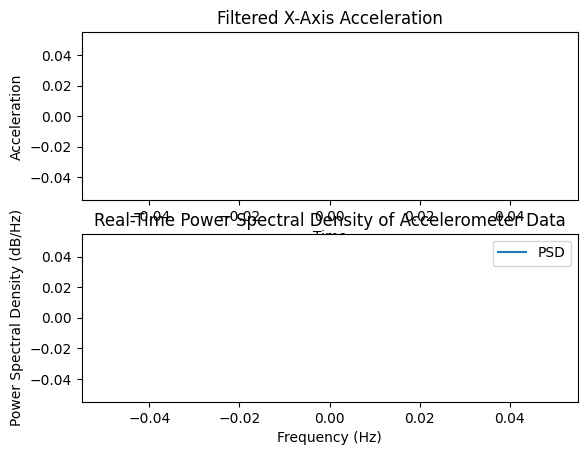

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch
import threading
import socket

# Constants for socket communication
HOST = '192.168.1.97'  # IP address of the host
PORT = 8000  # Port number to listen on

# Constants for signal processing
window_length = 200
overlap_ratio = 0.5
nfft = 2000
fs = 1000
cutoff_freq = 4.9
filter_order = 4

# Set up real-time data acquisition
fig, axs = plt.subplots(2, 1)
axs[0].plot([0], [0], '-b')  # Initialize the plot with dummy data
axs[0].set_title('Filtered X-Axis Acceleration')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Acceleration')

axs[1].plot([0], [0])  # Initialize the plot with dummy data
axs[1].set_title('Real-Time Power Spectral Density of Accelerometer Data')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Power Spectral Density (dB/Hz)')
axs[1].legend(['PSD', 'Cutoff Frequency'])

# Create a socket for receiving data
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((HOST, PORT))

# Flag for indicating whether to stop the program
stop_flag = False

def receive_data():
    while not stop_flag:
        data, address = sock.recvfrom(8192)
        # Process received data here
        # Extract accelerometer readings along each axis
        accelerometer_data = np.frombuffer(data, dtype=np.float32)
        x = accelerometer_data[0::3]
        y = accelerometer_data[1::3]
        z = accelerometer_data[2::3]
        
        # Check if the length of x is greater than or equal to the window length
        if len(x) >= window_length:
            # Apply low-pass filter to accelerometer data
            normalized_cutoff_freq = cutoff_freq / (fs / 2)
            b, a = butter(filter_order, normalized_cutoff_freq, 'low')
            x_filtered = filtfilt(b, a, x)
            
            # Perform real-time data processing, such as applying PSD
            psd, freq = welch(x_filtered, fs, window='hanning', nperseg=window_length,
                              noverlap=int(window_length * overlap_ratio), nfft=nfft)

            # Estimate the cutoff frequency using the "knee" or "elbow" point detection
            cutoff_idx = np.argmax(psd)
            cutoff_freq = freq[cutoff_idx]

            # Update the plot
            axs[0].plot(x_filtered, '-b')
            axs[0].set_title('Filtered X-Axis Acceleration')
            axs[0].set_xlabel('Time')
            axs[0].set_ylabel('Acceleration')

            axs[1].plot(freq, 10 * np.log10(psd))
            axs[1].plot(cutoff_freq, 10 * np.log10(psd[cutoff_idx]), 'ro', markersize=10)
            axs[1].set_title('Real-Time Power Spectral Density of Accelerometer Data')
            axs[1].set_xlabel('Frequency (Hz)')
            axs[1].set_ylabel('Power Spectral Density (dB/Hz)')

            axs[0].set_xlim([0, len(x_filtered)])
            axs[1].set_xlim([freq[0], freq[-1]])

            plt.draw()  # Update the figure

# Start the data receiving thread
receive_thread = threading.Thread(target=receive_data)
receive_thread.start()

# Wait for user input to stop the program
input('Press Enter to stop the program...')

# Set the stop flag to True to stop the data receiving thread
stop_flag = True

# Wait for the data receiving thread to finish
receive_thread.join()

# Close the socket when finished
sock.close()


Socket bound to 192.168.1.97:8000
Received from ('192.168.1.121', 33034): b'758110.21796, 3,  -1.113,  2.248,  9.389, 4,  -0.000, -0.002, -0.000, 5,  23.719,  9.019, -3.656'
Listening.....
Received from ('192.168.1.121', 33034): b'758110.42370, 3,  -1.110,  2.246,  9.393, 4,   0.000,  0.002, -0.001, 5,  23.588,  9.019, -3.675'
Listening.....
Received from ('192.168.1.121', 33034): b'758110.62943, 3,  -1.161,  2.238,  9.401, 4,   0.000,  0.001, -0.001, 5,  23.738,  9.225, -3.525'
Listening.....
Received from ('192.168.1.121', 33034): b'758110.83517, 3,  -1.085,  2.241,  9.401, 4,   0.000, -0.002,  0.002, 5,  23.644,  9.413, -3.581'
Listening.....
Received from ('192.168.1.121', 33034): b'758111.04090, 3,  -1.152,  2.233,  9.411, 4,  -0.000, -0.003, -0.001, 5,  23.606,  9.506, -3.600'
Listening.....
Received from ('192.168.1.121', 33034): b'758111.24664, 3,  -0.966,  2.271,  9.365, 4,   0.000, -0.010, -0.005, 5,  23.513,  9.675, -3.825'
Listening.....
Received from ('192.168.1.121', 3303

KeyboardInterrupt: 

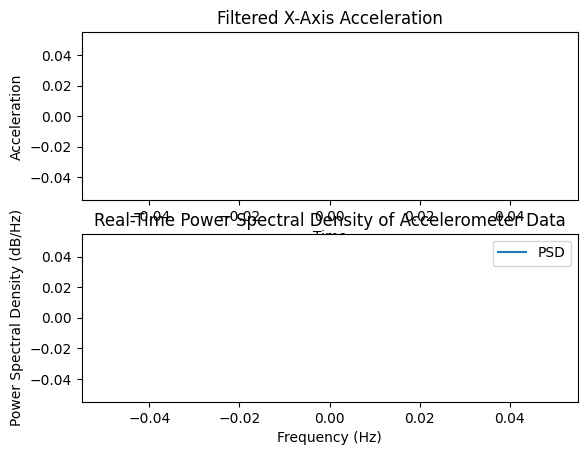

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch
import socket

# Constants for socket communication
HOST = '192.168.1.97'  # IP address of the host
PORT = 8000  # Port number to listen on

# Constants for signal processing
window_length = 200
overlap_ratio = 0.5
nfft = 2000
fs = 1000
cutoff_freq = 4.9
filter_order = 4

# Set up real-time data acquisition
fig, axs = plt.subplots(2, 1)
axs[0].plot([0], [0], '-b')  # Initialize the plot with dummy data
axs[0].set_title('Filtered X-Axis Acceleration')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Acceleration')

axs[1].plot([0], [0])  # Initialize the plot with dummy data
axs[1].set_title('Real-Time Power Spectral Density of Accelerometer Data')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Power Spectral Density (dB/Hz)')
axs[1].legend(['PSD', 'Cutoff Frequency'])

# Create a socket for receiving data
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((HOST, PORT))
print(f"Socket bound to {HOST}:{PORT}")

while True:
    data, address = sock.recvfrom(8192)
    print(f"Received from {address}: {data}")
    print("Listening.....")
    # Process received data here
    # Extract accelerometer readings along each axis
    accelerometer_data = np.frombuffer(data, dtype=np.float32)
    x = accelerometer_data[0::3]
    y = accelerometer_data[1::3]
    z = accelerometer_data[2::3]

    # Check if the length of x is greater than or equal to the window length
    if len(x) >= window_length:
        # Apply low-pass filter to accelerometer data
        normalized_cutoff_freq = cutoff_freq / (fs / 2)
        b, a = butter(filter_order, normalized_cutoff_freq, 'low')
        x_filtered = filtfilt(b, a, x)

        # Perform real-time data processing, such as applying PSD
        psd, freq = welch(x_filtered, fs, window='hanning', nperseg=window_length,
                          noverlap=int(window_length * overlap_ratio), nfft=nfft)

        # Estimate the cutoff frequency using the "knee" or "elbow" point detection
        cutoff_idx = np.argmax(psd)
        cutoff_freq = freq[cutoff_idx]

        # Update the plot
        axs[0].cla()  # Clear the previous plot
        axs[0].plot(x_filtered, '-b')
        axs[0].set_title('Filtered X-Axis Acceleration')
        axs[0].set_xlabel('Time')
        axs[0].set_ylabel('Acceleration')

        axs[1].cla()  # Clear the previous plot
        axs[1].plot(freq, 10 * np.log10(psd))
        axs[1].plot(cutoff_freq, 10 * np.log10(psd[cutoff_idx]), 'ro', markersize=10)
        axs[1].set_title('Real-Time Power Spectral Density of Accelerometer Data')
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('Power Spectral Density (dB/Hz)')
        axs[1].legend(['PSD', 'Cutoff Frequency'])

        axs[0].set_xlim([0, len(x_filtered)])
        axs[1].set_xlim([freq[0], freq[-1]])

        plt.draw()  # Update the figure
        plt.pause(0.001)  # Show the plot

# Close the socket when finished
sock.close()


Received from ('192.168.1.121', 39920): b'758824.53158, 3,   0.284,  0.169,  9.712, 4,  -0.000,  0.000,  0.000, 5,  26.456, -9.713, -0.431'
Listening.....
Received from ('192.168.1.121', 39920): b'758824.73731, 3,   0.281,  0.167,  9.712, 4,  -0.000, -0.000,  0.000, 5,  26.719, -9.619, -0.356'
Listening.....
Received from ('192.168.1.121', 39920): b'758824.94305, 3,   0.284,  0.173,  9.712, 4,  -0.000, -0.000,  0.000, 5,  26.588, -9.750, -0.300'
Listening.....
Received from ('192.168.1.121', 39920): b'758825.14878, 3,   0.281,  0.173,  9.712, 4,  -0.000, -0.000,  0.000, 5,  26.550, -9.619, -0.525'
Listening.....
Received from ('192.168.1.121', 39920): b'758825.35452, 3,   0.283,  0.171,  9.712, 4,  -0.000,  0.000,  0.000, 5,  26.531, -9.506, -0.394'
Listening.....
Received from ('192.168.1.121', 39920): b'758825.56025, 3,   0.281,  0.168,  9.713, 4,  -0.000,  0.000, -0.000, 5,  26.456, -9.506, -0.506'
Listening.....
Received from ('192.168.1.121', 39920): b'758825.76598, 3,   0.287,  0

KeyboardInterrupt: 

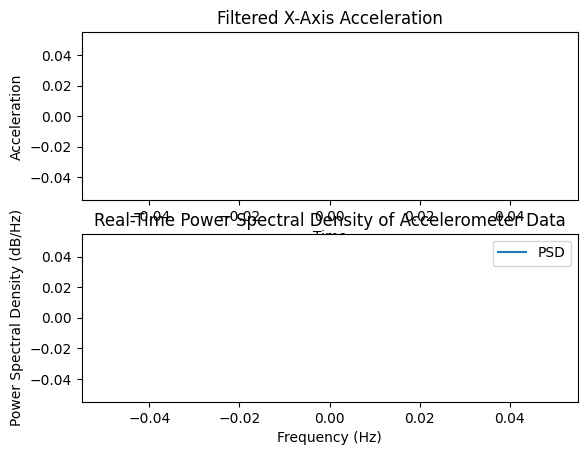

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch
import socket

# Constants for socket communication
HOST = '192.168.1.97'  # IP address of the host
PORT = 8000  # Port number to listen on

# Constants for signal processing
window_length = 200
overlap_ratio = 0.5
nfft = 2000
fs = 1000
cutoff_freq = 4.9
filter_order = 4

# Set up real-time data acquisition
fig, axs = plt.subplots(2, 1)
axs[0].plot([0], [0], '-b')  # Initialize the plot with dummy data
axs[0].set_title('Filtered X-Axis Acceleration')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Acceleration')

axs[1].plot([0], [0])  # Initialize the plot with dummy data
axs[1].set_title('Real-Time Power Spectral Density of Accelerometer Data')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Power Spectral Density (dB/Hz)')
axs[1].legend(['PSD', 'Cutoff Frequency'])

# Create a socket for receiving data
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((HOST, PORT))

while True:
    data, address = sock.recvfrom(8192)
    print(f"Received from {address}: {data}")
    print("Listening.....")
    # Process received data here
    message = data.decode('utf-8')
    values = message.split(',')
    accelerometer_data = np.array([float(value.strip()) for value in values[2:]])
    x = accelerometer_data[0::3]
    y = accelerometer_data[1::3]
    z = accelerometer_data[2::3]

    # Check if the length of x is greater than or equal to the window length
    if len(x) >= window_length:
        # Apply low-pass filter to accelerometer data
        normalized_cutoff_freq = cutoff_freq / (fs / 2)
        b, a = butter(filter_order, normalized_cutoff_freq, 'low')
        x_filtered = filtfilt(b, a, x)

        # Perform real-time data processing, such as applying PSD
        psd, freq = welch(x_filtered, fs, window='hanning', nperseg=window_length,
                          noverlap=int(window_length * overlap_ratio), nfft=nfft)

        # Estimate the cutoff frequency using the "knee" or "elbow" point detection
        cutoff_idx = np.argmax(psd)
        cutoff_freq = freq[cutoff_idx]

        # Update the plot
        axs[0].cla()  # Clear the previous plot
        axs[0].plot(x_filtered, '-b')
        axs[0].set_title('Filtered X-Axis Acceleration')
        axs[0].set_xlabel('Time')
        axs[0].set_ylabel('Acceleration')

        axs[1].cla()  # Clear the previous plot
        axs[1].plot(freq, 10 * np.log10(psd))
        axs[1].plot(cutoff_freq, 10 * np.log10(psd[cutoff_idx]), 'ro', markersize=10)
        axs[1].set_title('Real-Time Power Spectral Density of Accelerometer Data')
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('Power Spectral Density (dB/Hz)')
        axs[1].legend(['PSD', 'Cutoff Frequency'])

        axs[0].set_xlim([0, len(x_filtered)])
        axs[1].set_xlim([freq[0], freq[-1]])

        plt.draw()  # Update the figure
        plt.pause(0.001)  # Show the plot

# Close the socket when finished
sock.close()


Received from ('192.168.1.121', 39920): b'759132.20740, 3,   0.290,  2.507,  9.316'
Listening.....
Received from ('192.168.1.121', 39920): b'759132.41314, 3,  -0.136,  2.942,  9.620'
Listening.....
Received from ('192.168.1.121', 39920): b'759132.61887, 3,   0.348,  2.701,  8.964'
Listening.....
Received from ('192.168.1.121', 39920): b'759132.82461, 3,   0.153,  2.898,  9.410'
Listening.....
Received from ('192.168.1.121', 39920): b'759133.03035, 3,   0.390,  3.009,  9.193'
Listening.....
Received from ('192.168.1.121', 39920): b'759133.23608, 3,   0.338,  3.045,  9.184'
Listening.....
Received from ('192.168.1.121', 39920): b'759133.44182, 3,   0.376,  2.995,  9.286'
Listening.....
Received from ('192.168.1.121', 39920): b'759133.64756, 3,   0.402,  2.987,  9.255, 4,   0.007, -0.017, -0.004, 5,  22.463,-21.713,  5.850'
Listening.....
Received from ('192.168.1.121', 39920): b'759133.85330, 3,   0.640,  2.836,  9.104, 4,  -0.096, -0.166,  0.037, 5,  22.369,-21.469,  5.513'
Listening...

KeyboardInterrupt: 

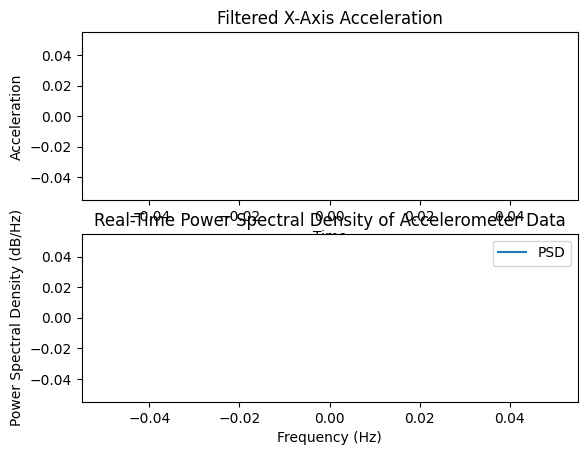

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch
import socket

# Constants for socket communication
HOST = '192.168.1.97'  # IP address of the host
PORT = 8000  # Port number to listen on

# Constants for signal processing
window_length = 200
overlap_ratio = 0.5
nfft = 2000
fs = 1000
cutoff_freq = 4.9
filter_order = 4

# Set up real-time data acquisition
fig, axs = plt.subplots(2, 1)
axs[0].plot([0], [0], '-b')  # Initialize the plot with dummy data
axs[0].set_title('Filtered X-Axis Acceleration')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Acceleration')

axs[1].plot([0], [0])  # Initialize the plot with dummy data
axs[1].set_title('Real-Time Power Spectral Density of Accelerometer Data')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Power Spectral Density (dB/Hz)')
axs[1].legend(['PSD', 'Cutoff Frequency'])

# Create a socket for receiving data
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((HOST, PORT))

plt.ion()  # Enable interactive mode

while True:
    data, address = sock.recvfrom(8192)
    print(f"Received from {address}: {data}")
    print("Listening.....")
    # Process received data here
    message = data.decode('utf-8')
    values = message.split(',')
    accelerometer_data = np.array([float(value.strip()) for value in values[2:]])
    x = accelerometer_data[0::3]
    y = accelerometer_data[1::3]
    z = accelerometer_data[2::3]

    # Check if the length of x is greater than or equal to the window length
    if len(x) >= window_length:
        # Apply low-pass filter to accelerometer data
        normalized_cutoff_freq = cutoff_freq / (fs / 2)
        b, a = butter(filter_order, normalized_cutoff_freq, 'low')
        x_filtered = filtfilt(b, a, x)

        # Perform real-time data processing, such as applying PSD
        psd, freq = welch(x_filtered, fs, window='hanning', nperseg=window_length,
                          noverlap=int(window_length * overlap_ratio), nfft=nfft)

        # Estimate the cutoff frequency using the "knee" or "elbow" point detection
        cutoff_idx = np.argmax(psd)
        cutoff_freq = freq[cutoff_idx]

        # Update the plot
        axs[0].cla()  # Clear the previous plot
        axs[0].plot(x_filtered, '-b')
        axs[0].set_title('Filtered X-Axis Acceleration')
        axs[0].set_xlabel('Time')
        axs[0].set_ylabel('Acceleration')

        axs[1].cla()  # Clear the previous plot
        axs[1].plot(freq, 10 * np.log10(psd))
        axs[1].plot(cutoff_freq, 10 * np.log10(psd[cutoff_idx]), 'ro', markersize=10)
        axs[1].set_title('Real-Time Power Spectral Density of Accelerometer Data')
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('Power Spectral Density (dB/Hz)')
        axs[1].legend(['PSD', 'Cutoff Frequency'])

        axs[0].set_xlim([0, len(x_filtered)])
        axs[1].set_xlim([freq[0], freq[-1]])

        plt.draw()  # Update the figure
        plt.pause(0.001)  # Show the plot

# Close the socket when finished
sock.close()


Received from ('192.168.1.121', 44084): b'759643.20603, 3,   0.248,  0.140,  9.712, 4,  -0.000, -0.000,  0.000, 5,  24.525,-23.606,  3.169'
Listening.....
Received from ('192.168.1.121', 44084): b'759643.41177, 3,   0.254,  0.141,  9.711, 4,   0.000,  0.000,  0.000, 5,  24.769,-23.738,  3.150'
Listening.....
Received from ('192.168.1.121', 44084): b'759643.61750, 3,   0.247,  0.141,  9.710, 4,  -0.000,  0.000,  0.000, 5,  24.844,-23.831,  3.000'
Listening.....
Received from ('192.168.1.121', 44084): b'759643.82324, 3,   0.252,  0.141,  9.712, 4,  -0.000, -0.000, -0.000, 5,  24.863,-23.888,  2.963'
Listening.....
Received from ('192.168.1.121', 44084): b'759644.02897, 3,   0.254,  0.138,  9.712, 4,   0.000, -0.000,  0.000, 5,  25.069,-24.019,  3.056'
Listening.....
Received from ('192.168.1.121', 44084): b'759644.23471, 3,   0.249,  0.139,  9.713, 4,  -0.000,  0.000, -0.000, 5,  25.125,-24.094,  3.000'
Listening.....
Received from ('192.168.1.121', 44084): b'759644.44044, 3,   0.247,  0

KeyboardInterrupt: 

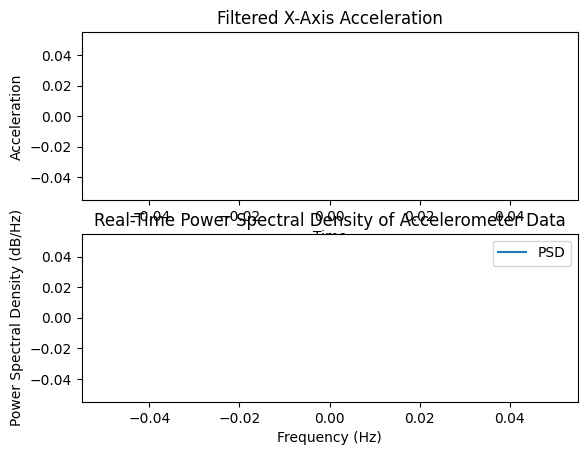

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch
import socket

# Constants for socket communication
HOST = '192.168.1.97'  # IP address of the host
PORT = 8000  # Port number to listen on

# Constants for signal processing
window_length = 200
overlap_ratio = 0.5
nfft = 2000
fs = 1000
cutoff_freq = 4.9
filter_order = 4

# Set up real-time data acquisition
fig, axs = plt.subplots(2, 1)
axs[0].plot([0], [0], '-b')  # Initialize the plot with dummy data
axs[0].set_title('Filtered X-Axis Acceleration')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Acceleration')

axs[1].plot([0], [0])  # Initialize the plot with dummy data
axs[1].set_title('Real-Time Power Spectral Density of Accelerometer Data')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Power Spectral Density (dB/Hz)')
axs[1].legend(['PSD', 'Cutoff Frequency'])

# Create a socket for receiving data
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((HOST, PORT))

plt.ion()  # Enable interactive mode

while True:
    data, address = sock.recvfrom(8192)
    print(f"Received from {address}: {data}")
    print("Listening.....")
    # Process received data here
    message = data.decode('utf-8')
    values = message.split(',')
    accelerometer_data = np.array([float(value.strip()) for value in values[2:]])
    x = accelerometer_data[0::3]
    y = accelerometer_data[1::3]
    z = accelerometer_data[2::3]

    # Check if the length of x is greater than or equal to the window length
    if len(x) >= window_length:
        # Apply low-pass filter to accelerometer data
        normalized_cutoff_freq = cutoff_freq / (fs / 2)
        b, a = butter(filter_order, normalized_cutoff_freq, 'low')
        x_filtered = filtfilt(b, a, x)

        # Perform real-time data processing, such as applying PSD
        psd, freq = welch(x_filtered, fs, window='hanning', nperseg=window_length,
                          noverlap=int(window_length * overlap_ratio), nfft=nfft)

        # Estimate the cutoff frequency using the "knee" or "elbow" point detection
        cutoff_idx = np.argmax(psd)
        cutoff_freq = freq[cutoff_idx]

        # Update the plot
        axs[0].cla()  # Clear the previous plot
        axs[0].plot(x_filtered, '-b')
        axs[0].set_title('Filtered X-Axis Acceleration')
        axs[0].set_xlabel('Time')
        axs[0].set_ylabel('Acceleration')

        axs[1].cla()  # Clear the previous plot
        axs[1].plot(freq, 10 * np.log10(psd))
        axs[1].plot(cutoff_freq, 10 * np.log10(psd[cutoff_idx]), 'ro', markersize=10)
        axs[1].set_title('Real-Time Power Spectral Density of Accelerometer Data')
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('Power Spectral Density (dB/Hz)')
        axs[1].legend(['PSD', 'Cutoff Frequency'])

        axs[0].set_xlim([0, len(x_filtered)])
        axs[1].set_xlim([freq[0], freq[-1]])

        fig.canvas.draw()  # Update the figure canvas

# Close the socket when finished
sock.close()


OSError: [WinError 10049] The requested address is not valid in its context

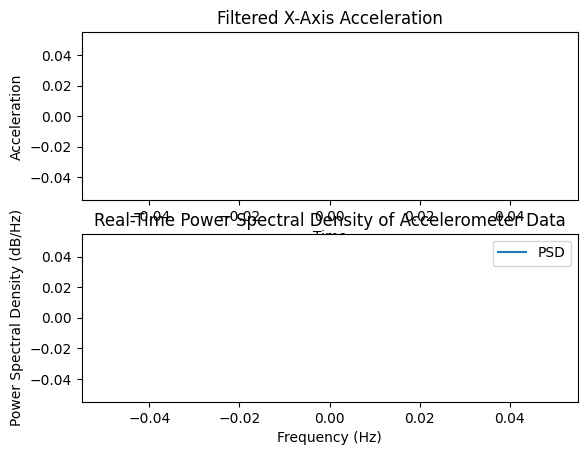

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch
import socket

# Constants for socket communication
HOST = '192.168.1.121'  # IP address of the host
PORT = 39920  # Port number to listen on

# Constants for signal processing
window_length = 200
overlap_ratio = 0.5
nfft = 2000
fs = 1000
cutoff_freq = 4.9
filter_order = 4

# Set up real-time data acquisition
fig, axs = plt.subplots(2, 1)
axs[0].plot([0], [0], '-b')  # Initialize the plot with dummy data
axs[0].set_title('Filtered X-Axis Acceleration')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Acceleration')

axs[1].plot([0], [0])  # Initialize the plot with dummy data
axs[1].set_title('Real-Time Power Spectral Density of Accelerometer Data')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Power Spectral Density (dB/Hz)')
axs[1].legend(['PSD', 'Cutoff Frequency'])

# Create a socket for receiving data
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((HOST, PORT))

while True:
    data, address = sock.recvfrom(8192)
    print(f"Received from {address}: {data}")
    print("Listening.....")
    # Process received data here
    message = data.decode('utf-8')
    values = message.split(',')
    accelerometer_data = np.array([float(value.strip()) for value in values[2:]])
    x = accelerometer_data[0::3]
    y = accelerometer_data[1::3]
    z = accelerometer_data[2::3]

    # Check if the length of x is greater than or equal to the window length
    if len(x) >= window_length:
        # Apply low-pass filter to accelerometer data
        normalized_cutoff_freq = cutoff_freq / (fs / 2)
        b, a = butter(filter_order, normalized_cutoff_freq, 'low')
        x_filtered = filtfilt(b, a, x)

        # Perform real-time data processing, such as applying PSD
        psd, freq = welch(x_filtered, fs, window='hanning', nperseg=window_length,
                          noverlap=int(window_length * overlap_ratio), nfft=nfft)

        # Estimate the cutoff frequency using the "knee" or "elbow" point detection
        cutoff_idx = np.argmax(psd)
        cutoff_freq = freq[cutoff_idx]

        # Update the plot
        axs[0].cla()  # Clear the previous plot
        axs[0].plot(x_filtered, '-b')
        axs[0].set_title('Filtered X-Axis Acceleration')
        axs[0].set_xlabel('Time')
        axs[0].set_ylabel('Acceleration')

        axs[1].cla()  # Clear the previous plot
        axs[1].plot(freq, 10 * np.log10(psd))
        axs[1].plot(cutoff_freq, 10 * np.log10(psd[cutoff_idx]), 'ro', markersize=10)
        axs[1].set_title('Real-Time Power Spectral Density of Accelerometer Data')
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('Power Spectral Density (dB/Hz)')
        axs[1].legend(['PSD', 'Cutoff Frequency'])

        axs[0].set_xlim([0, len(x_filtered)])
        axs[1].set_xlim([freq[0], freq[-1]])

        plt.show(block=False)  # Update and display the plot

# Close the socket when finished
sock.close()


In [1]:
import secrets

secret_key = secrets.token_urlsafe(16)
print(secret_key)


usCLp6jRv7TznmeKFQ90cQ
